In [29]:
import pandas as pd
import seaborn as sns
import scipy
import statsmodels.api as sm

In [23]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [24]:
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<AxesSubplot:>

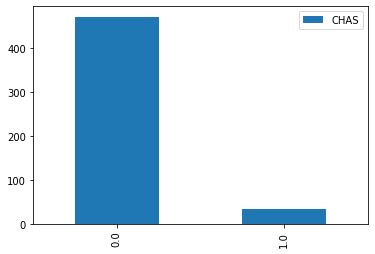

In [25]:
CHAS_df=boston_df['CHAS'].value_counts().to_frame()
CHAS_df.plot.bar()

As expected, far fewer tracts bound the river.

<AxesSubplot:xlabel='age-bin', ylabel='MEDV'>

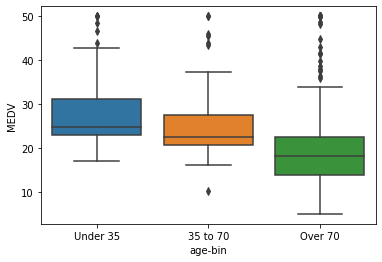

In [26]:
boston_df['age-bin']= pd.cut(boston_df['AGE'],[0,35,70,max(boston_df['AGE'])], labels=['Under 35','35 to 70','Over 70'])
boston_df.head()
sns.boxplot(x='age-bin',y='MEDV',data=boston_df)

Here we see a steady decline in median home value with age, with over 70 having the largest spread and most outliers.

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

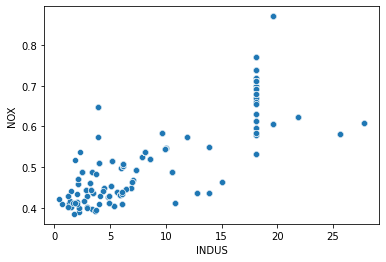

In [17]:
sns.scatterplot(x='INDUS',y='NOX',data=boston_df)

There appears to be a generally positive correlation between non-retail acre concentration and nitrous oxide concentrations.  That is - As nitrous oxygen concentration increases, the proportion of non-retail acreage also increases.

c:\Users\spoha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

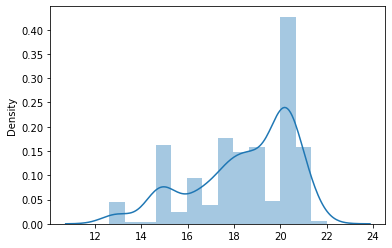

In [18]:
sns.distplot(x=boston_df['PTRATIO'])

We see here that the distrubution is right skewed.

## Hypothesis Testing
### Median Home Price and location on River
We will test whether the home values for plots bounded by the river are are different from home values not bounded by the river

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median home values between homes bounded by the river and homes not bounded by the river")
*   $H\_0: µ\_1 = µ\_2$ ("there is a difference in median home values between homes bounded by the river and homes not bounded by the river")

In [22]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

The P-Value less than .05, so we can reject the null hypothesis and there is evidence that whether or not home values are bounded by the river has a statistically significant impact on median home values.

### Test the difference in median home values based on age
*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [27]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age-bin']=='Under 35']['AGE'],boston_df[boston_df['age-bin']=='35 to 70']['AGE'],boston_df[boston_df['age-bin']=='Over 70']['AGE'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 2162.99425724172, P-Value: 9.005770381051771e-248


P is less than .05 so we can reject the null hypothesis and there is evidence that median price averages are correlated with age.

### Test Nitrous Oxide vs Proportion of Non-Retail(Pearson Correlation)
*   $H\_0:$ The nitrous oxide level is not correlated with the proportion of non-retail
*   $H\_0:$ The nitrous oxide level is correlated with the proportion of non-retail

In [28]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['AGE'])

PearsonRResult(statistic=0.7314701037859584, pvalue=7.452392170286852e-86)

The P Value is less than .05, so we can reject the null hypothesis and there is evidence to support the hypothesis that nitrous oxide levels are correlated with the proportion of non-retail

### Effect of Distance to Employment Centers on Median Home Value
*   $H\_0:$ The distance to employment centers in Boston is not correlated with the median home value
*   $H\_0:$ The distance to employment centers in Boston is correlated with the median home value

In [31]:
y=boston_df['MEDV']
X=boston_df['DIS']
X=sm.add_constant(X)
reg_model=sm.OLS(y,X).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 26 Aug 2022   Prob (F-statistic):           1.21e-08
Time:                        12:15:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P is less than .05 so we can reject the null hypothesis and there is evidence that the distance from employment centers is correlated with median home values